In [3]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "carinsurance1"

In [4]:
install.packages("conflicted", repos = "https://cloud.r-project.org")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository https://cloud.r-project.org/src/contrib:
  cannot open URL 'https://cloud.r-project.org/src/contrib/PACKAGES'”
Warning message:
“package ‘conflicted’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


# 1. Assessing Data Quality

## Load the carInsurance data set about the insurance risk rating of cars based on several characteristics of each car

In [5]:
df <- load("/kaggle/input/carinsurance1/carInsurance.Rdata")


In [6]:
carIns

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,NA,audi,gas,std,four,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875


## (a) Check if there are any missing values.

In [14]:
#Existen valores faltantes en el dataset
any_na(carIns)

ERROR: Error in any_na(carIns): could not find function "any_na"


## (b) Count the number of cases that have, at least, one missing value.

In [10]:
##Casos con valores faltantes en el dataset
faltantes <- sum(!complete.cases(carIns))

# Output the count
print(faltantes)

[1] 46


## (c) Create a new data set by removing all the cases that have missing values.


In [15]:
#Crear un nuevo dataset sin los valores faltantes
df_rm <- na.omit(carIns)


In [16]:
df_rm

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
2,192,bmw,gas,std,two,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430
0,192,bmw,gas,std,four,sedan,rwd,front,101.2,⋯,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16925
0,188,bmw,gas,std,two,sedan,rwd,front,101.2,⋯,164,mpfi,3.31,3.19,9.00,121,4250,21,28,20970
0,188,bmw,gas,std,four,sedan,rwd,front,101.2,⋯,164,mpfi,3.31,3.19,9.00,121,4250,21,28,21105
2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,⋯,61,2bbl,2.91,3.03,9.50,48,5100,47,53,5151


## (d) Create a new data set by imputing all the missing values with 0.


In [17]:
#Convertir la columna nDoors a numeric
carIns$nDoors <- as.numeric(carIns$nDoors)


df_0 <- carIns
df_0[is.na(df_0)] <- 0

In [18]:
df_0

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,1,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,1,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,0,audi,gas,std,2,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,1,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,0,audi,gas,std,1,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
1,158,audi,gas,turbo,1,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875


## (e) Create a new data set by imputing the mean in all the columns which have double type values.


In [19]:
#Columnas que son de tipo double
double_col <- sapply(carIns, is.double)

#Copia del dataset original
df_mean <- carIns

#Imputar los valores solo en las columnas de tipo double
df_mean[, double_col] <- lapply(df_mean[, double_col], function(x) {
  if (any(is.na(x))) {
    mean_value <- mean(x, na.rm = TRUE)
    x[is.na(x)] <- mean_value
  }
  return(x)
})


In [20]:
df_mean

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,NA,alfa-romero,gas,std,2.000000,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,NA,alfa-romero,gas,std,2.000000,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,NA,alfa-romero,gas,std,2.000000,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,1.000000,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,1.000000,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,NA,audi,gas,std,2.000000,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,1.000000,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,NA,audi,gas,std,1.000000,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
1,158,audi,gas,turbo,1.000000,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875


## (f) Create a new data set by imputing the mode in all the columns which have integer type values.


In [21]:
#Columnas que son de tipo double
integer_col <- sapply(carIns, is.integer)

#Copia del dataset original
df_mode <- carIns

#Imputar los valores solo en las columnas de tipo integer
df_mode[, integer_col] <- lapply(df_mode[, integer_col], function(x) {
if (any(is.na(x))) {
    mode_value <- which.max(table(x))
    x[is.na(x)] <- as.numeric(names(mode_value))
  }
  return(x)
})

In [22]:
df_mode

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
3,161,alfa-romero,gas,std,2,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,161,alfa-romero,gas,std,2,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,161,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,1,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,1,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,161,audi,gas,std,2,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,1,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,161,audi,gas,std,1,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
1,158,audi,gas,turbo,1,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875


## (g) Create a new data set by imputing the most frequent value to the column ”nDoors”.


In [23]:
#Encontrar el valor mas frecuente en nDoors
frecuente <- names(table(carIns$nDoors))[which.max(table(carIns$nDoors))]

#Copia del dataset original
df_frec <- carIns

#Imputar los valores en la colmuna nDoor con el valor mas frecuente
df_frec$nDoors[is.na(df_frec$nDoors)] <- frecuente



In [24]:
df_frec

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,NA,alfa-romero,gas,std,2,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,NA,alfa-romero,gas,std,2,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,NA,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,1,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,1,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,NA,audi,gas,std,2,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,1,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,NA,audi,gas,std,1,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
1,158,audi,gas,turbo,1,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875


## (h) Combine the three last imputations to obtain a final dataset. Are there any duplicated cases?


In [25]:
#Para poder combinar las columnas nDoors que son de diferente typo, las convertimos a caracter en los 3 datasets
df_mean$nDoors <- as.character(df_mean$nDoors)
df_mode$nDoors <- as.character(df_mode$nDoors)
df_frec$nDoors <- as.character(df_frec$nDoors)

#Creamos el dataset que combina los 3 anteriores
df_combine <- bind_rows(df_mean, df_mode, df_frec)

#Revisar si existen duplicados
duplicados <- df_combine %>% distinct() %>% count()
if (any(duplicados$n > 1)) {
  print(duplicados)
} else {
  print("No hay duplicados.")
}

# A tibble: 1 × 1
      n
  <int>
1   253


In [26]:
df_combine

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<dbl>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
3,NA,alfa-romero,gas,std,2,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,NA,alfa-romero,gas,std,2,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,NA,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,1,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,1,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,NA,audi,gas,std,2,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,1,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,NA,audi,gas,std,1,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
1,158,audi,gas,turbo,1,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875


# 2. Data Pre-Processing

## 1. Load the package dlookr. Use the same car insurance data set above and apply the following transformations to the price attribute. Be critical regarding the obtained results.


## (a) Apply range-based normalization and z-score normalization.

In [27]:
#Aplicar un rango de normalizacion a la columna "price"
normalized_range <- carIns
normalized_range[, "price"] <- apply(carIns[, "price"], 2, function(x) (x - min(x)) / (max(x) - min(x)))

#Aplicar un rango de normalizacion zscore a la columna "price"
normalized_zscore <- carIns
normalized_zscore[, "price"] <- apply(carIns[, "price"], 2, function(x) (x - mean(x)) / sd(x))


In [28]:
normalized_range
normalized_zscore

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
3,NA,alfa-romero,gas,std,2,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,NA
3,NA,alfa-romero,gas,std,2,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,NA
1,NA,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,NA
2,164,audi,gas,std,1,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,NA
2,164,audi,gas,std,1,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,NA
2,NA,audi,gas,std,2,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,NA
1,158,audi,gas,std,1,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,NA
1,NA,audi,gas,std,1,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,NA
1,158,audi,gas,turbo,1,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,NA


symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
3,NA,alfa-romero,gas,std,2,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,NA
3,NA,alfa-romero,gas,std,2,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,NA
1,NA,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,NA
2,164,audi,gas,std,1,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,NA
2,164,audi,gas,std,1,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,NA
2,NA,audi,gas,std,2,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,NA
1,158,audi,gas,std,1,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,NA
1,NA,audi,gas,std,1,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,NA
1,158,audi,gas,turbo,1,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,NA


 ## (b) Discretize it into 4 equal-frequency ranges an into 4 equal-width ranges.

In [29]:
# Discretize into four equal-frequency ranges
equal_freq <- cut(carIns[["price"]], breaks = quantile(carIns[["price"]], probs = seq(0, 1, by = 0.25), na.rm = TRUE), labels = FALSE, include.lowest = TRUE)

# Discretize into four equal-width ranges
equal_width <- cut(carIns[["price"]], breaks = 4, labels = FALSE, include.lowest = TRUE)


In [30]:
equal_freq
equal_width

[1]  3  3  3  3  4  3  4  4  4 NA  3  4  4  4  4  4  4  4  1  1  1  1  1  2  1
 [26]  1  1  2  2  3  1  1  1  1  1  1  1  2  2  2  2  3  3  1 NA NA  3  4  4  4
 [51]  1  1  1  1  1  3  3  3  3  2  2  3  2  3  3  4  4  4  4  4  4  4  4  4  4
 [76]  4  1  1  1  1  2  2  3  3  3  1  2  2  2  1  1  1  1  1  1  2  1  2  2  2
[101]  2  3  3  3  4  4  4  3  3  3  3  3  4  4  4  4  4  4  1  2  1  1  1  2  3
[126]  4  4  4  4 NA  2  2  3  3  3  3  4  4  1  1  1  1  1  2  2  3  1  2  2  3
[151]  1  1  1  1  2  2  1  1  2  2  1  2  2  2  2  2  2  2  2  2  3  3  4  2  3
[176]  2  3  3  4  3  3  3  1  2  2  2  2  2  2  3  2  3  3  3  3  3  3  4  4  4
[201]  4  4  4  4  4

[1]  1  2  2  1  2  2  2  2  2 NA  2  2  2  2  2  3  4  4  1  1  1  1  1  1  1
 [26]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 NA NA  1  3  4  4
 [51]  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  2  2  3  3  3  3  3  3  4  4
 [76]  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
[101]  1  1  1  1  2  2  2  1  1  1  1  2  2  2  2  2  2  2  1  1  1  1  1  1  1
[126]  2  3  3  4 NA  1  1  1  1  1  2  2  2  1  1  1  1  1  1  1  1  1  1  1  1
[151]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1
[176]  1  1  1  2  2  2  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2
[201]  2  2  2  2  2

## 2. With the seed 111019 obtain the following samples on the car insurance data set.

## (a) A random sample of 60% of the cases, with replacement


In [31]:
#Fijar la seed
set.seed(111019)

#Generar un dataset con el 60% de los datos reemplazados
df_rand <- sample_frac(carIns, 0.6, replace = TRUE)

In [32]:
df_rand

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,128,nissan,diesel,std,2,sedan,fwd,front,94.5,⋯,103,idi,2.99,3.47,21.90,55,4800,45,50,7099
1,101,honda,gas,std,2,hatchback,fwd,front,93.7,⋯,92,1bbl,2.91,3.41,9.20,76,6000,30,34,6529
0,161,peugot,gas,std,1,sedan,rwd,front,107.9,⋯,120,mpfi,3.46,3.19,8.40,97,5000,19,24,16630
2,NA,audi,gas,std,2,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
0,102,subaru,gas,std,1,sedan,4wd,front,97.0,⋯,108,2bbl,3.62,2.64,9.00,82,4800,24,25,9233
3,NA,volkswagen,gas,std,2,convertible,fwd,front,94.5,⋯,109,mpfi,3.19,3.40,8.50,90,5500,24,29,11595
-2,103,volvo,gas,std,1,sedan,rwd,front,104.3,⋯,141,mpfi,3.78,3.15,9.50,114,5400,24,28,15985
2,137,honda,gas,std,2,hatchback,fwd,front,86.6,⋯,92,1bbl,2.91,3.41,9.60,58,4800,49,54,6479
1,148,dodge,gas,std,1,sedan,fwd,front,93.7,⋯,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6692


## (b) A stratified sample of 60% of the cases of cars, according to the fuelType attribute.


In [33]:
#Fijar la seed
set.seed(111019)

#Estratificar el dataset por fuelType y crear una lista de grupos
grupos_estratificados <- carIns %>%
  group_split(fuelType)

#Lista vacia para muestras 
muestras_estratificadas <- list()

#Recorrer cada grupo y que muestree el 60% de los casos con reemplazo y almacene en la lista
for (group in 
grupos_estratificados) {
  sample <- group %>% sample_frac(0.6, replace = TRUE)
  muestras_estratificadas[[length(muestras_estratificadas) + 1]] <- sample
}

#Combinar las muestras estratificadas a un dataset
df_strat <- bind_rows(muestras_estratificadas)

In [34]:
df_strat

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
0,NA,mazda,diesel,std,1,sedan,rwd,front,104.9,⋯,134,idi,3.43,3.64,22.0,72,4200,31,39,18344
-1,95,volvo,diesel,turbo,1,sedan,rwd,front,109.1,⋯,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
-1,93,mercedes-benz,diesel,turbo,1,sedan,rwd,front,115.6,⋯,183,idi,3.58,3.64,21.5,123,4350,22,25,31600
2,94,volkswagen,diesel,std,1,sedan,fwd,front,97.3,⋯,97,idi,3.01,3.40,23.0,52,4800,37,46,7995
0,93,mercedes-benz,diesel,turbo,2,hardtop,rwd,front,106.7,⋯,183,idi,3.58,3.64,21.5,123,4350,22,25,28176
0,NA,mazda,diesel,std,1,sedan,rwd,front,104.9,⋯,134,idi,3.43,3.64,22.0,72,4200,31,39,18344
0,91,toyota,diesel,std,1,hatchback,fwd,front,95.7,⋯,110,idi,3.27,3.35,22.5,56,4500,38,47,7788
-1,93,mercedes-benz,diesel,turbo,1,sedan,rwd,front,110.0,⋯,183,idi,3.58,3.64,21.5,123,4350,22,25,25552
0,161,peugot,diesel,turbo,1,sedan,rwd,front,107.9,⋯,152,idi,3.70,3.52,21.0,95,4150,28,33,13200


## (c) Use the table() function to inspect the distribution of values in each of the two samples above.


In [35]:
#Obtener los valores de distribucion del dataset aleatorio
random_sample_dist <- table(df_rand$fuelType)

random_sample_dist



diesel    gas 
     8    115 

In [36]:
#Obtener los valores de distribucion del dataset estratificado
stratified_sample_dist <- table(df_strat$fuelType)

stratified_sample_dist



diesel    gas 
    12    111 

## 4. Load the package corrplot and select the numeric attributes of the car insurance data set.


In [37]:
library(corrplot)


In [45]:
#Elegir los valores numericos del dataset
df_num <- carIns[sapply(carIns, is.numeric)]

df_num

symb,normLoss,nDoors,wheelBase,length,width,height,curbWeight,engineSize,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,NA,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,13495
3,NA,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,16500
1,NA,2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,154,5000,19,26,16500
2,164,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,5500,24,30,13950
2,164,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22,17450
2,NA,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,5500,19,25,15250
1,158,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,5500,19,25,17710
1,NA,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,110,5500,19,25,18920
1,158,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,5500,17,20,23875


## (a) Using the function cor(), obtain the pearson correlation coefficient between each pair of variables.

In [41]:
#Calcular el coeficiente de coorelacion de pearson
pearson <- cor(df_num, method = "pearson")

pearson

,symb,normLoss,wheelBase,length,width,height,curbWeight,engineSize,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
symb,1.00000000,NA,-0.5319537,-0.3576115,-0.2329191,-0.54103820,-0.2276906,-0.10578971,NA,NA,-0.17851508,NA,NA,-0.03582263,0.0346060,NA
normLoss,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
wheelBase,-0.53195368,NA,1.0000000,0.8745875,0.7951436,0.58943476,0.7763863,0.56932868,NA,NA,0.24978585,NA,NA,-0.47041361,-0.5440819,NA
length,-0.35761152,NA,0.8745875,1.0000000,0.8411183,0.49102946,0.8777285,0.68335987,NA,NA,0.15841371,NA,NA,-0.67090866,-0.7046616,NA
width,-0.23291906,NA,0.7951436,0.8411183,1.0000000,0.27921032,0.8670325,0.73543340,NA,NA,0.18112863,NA,NA,-0.64270434,-0.6772179,NA
height,-0.54103820,NA,0.5894348,0.4910295,0.2792103,1.00000000,0.2955717,0.06714874,NA,NA,0.26121423,NA,NA,-0.04863963,-0.1073576,NA
curbWeight,-0.22769059,NA,0.7763863,0.8777285,0.8670325,0.29557173,1.0000000,0.85059407,NA,NA,0.15136174,NA,NA,-0.75741378,-0.7974648,NA
engineSize,-0.10578971,NA,0.5693287,0.6833599,0.7354334,0.06714874,0.8505941,1.00000000,NA,NA,0.02897136,NA,NA,-0.65365792,-0.6774699,NA
bore,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA
stroke,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA


## (b) Apply the function cor.mtest() to the previous result to calculate the p-values and confidence intervals of the correlation coefficient for each pair of variables

In [42]:
library(psych)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [49]:
#Calcular los valores p e intervalos de confianza usando cor.mtest()
corr_test <- cor.mtest(df_num, conf.level = 0.95)

corr_test

,symb,normLoss,nDoors,wheelBase,length,width,height,curbWeight,engineSize,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
symb,0.000000e+00,3.432929e-13,3.094189e-27,2.255894e-16,1.409339e-07,7.770414e-04,5.531350e-17,1.025874e-03,1.311313e-01,5.750916e-02,0.899491367,1.043948e-02,3.098897e-01,7.359080e-05,6.101009e-01,6.222950e-01,2.449149e-01
normLoss,3.432929e-13,0.000000e+00,6.912223e-08,3.439849e-01,7.679017e-01,1.805700e-01,7.428895e-09,1.262266e-01,3.218897e-02,6.497992e-01,0.409653480,9.039883e-02,1.204793e-04,6.174988e-04,8.314261e-04,6.748692e-03,9.045759e-03
nDoors,3.094189e-27,6.912223e-08,0.000000e+00,2.672713e-11,6.269726e-09,3.837866e-03,2.777521e-17,5.142916e-03,8.040653e-01,1.073190e-01,0.880805546,1.807541e-02,7.713786e-02,5.238005e-04,7.681991e-01,5.283477e-01,5.139910e-01
wheelBase,2.255894e-16,3.439849e-01,2.672713e-11,0.000000e+00,9.699227e-66,5.612752e-46,1.437985e-20,1.439877e-42,5.233096e-19,1.475771e-13,0.022015524,3.039092e-04,2.540628e-07,1.209679e-07,1.103347e-12,3.420917e-17,8.076488e-20
length,1.409339e-07,7.679017e-01,6.269726e-09,9.699227e-66,0.000000e+00,4.332386e-56,7.731666e-14,8.728146e-67,1.496334e-29,1.162914e-21,0.066407079,2.329180e-02,8.505849e-18,3.232254e-05,3.595529e-28,4.428948e-32,8.016477e-30
width,7.770414e-04,1.805700e-01,3.837866e-03,5.612752e-46,4.332386e-56,0.000000e+00,5.031446e-05,2.460481e-63,3.685904e-36,6.240938e-18,0.009331725,9.348405e-03,5.048681e-25,1.614542e-03,2.807249e-25,7.321537e-29,9.200336e-38
height,5.531350e-17,7.428895e-09,2.777521e-17,1.437985e-20,7.731666e-14,5.031446e-05,0.000000e+00,1.688129e-05,3.387566e-01,1.234844e-02,0.421560143,1.549235e-04,1.158388e-01,2.745139e-06,4.885825e-01,1.254830e-01,5.514627e-02
curbWeight,1.025874e-03,1.262266e-01,5.142916e-03,1.439877e-42,8.728146e-67,2.460481e-63,1.688129e-05,0.000000e+00,1.404581e-58,2.013256e-25,0.016516670,3.027941e-02,4.321574e-38,1.228169e-04,1.929250e-39,2.007127e-46,2.189577e-53
engineSize,1.311313e-01,3.218897e-02,8.040653e-01,5.233096e-19,1.496334e-29,3.685904e-36,3.387566e-01,1.404581e-58,0.000000e+00,1.455497e-20,0.003243224,6.800779e-01,1.236008e-48,4.359121e-04,2.298962e-26,6.864987e-29,9.265492e-64
bore,5.750916e-02,6.497992e-01,1.073190e-01,1.475771e-13,1.162914e-21,6.240938e-18,1.234844e-02,2.013256e-25,1.455497e-20,0.000000e+00,0.430509785,9.415682e-01,4.459091e-19,1.620994e-04,1.328843e-20,1.331729e-20,1.567358e-16


## (c) Plot the all correlation information using the function corrplot. Explore some of its parameters

ERROR: Error in data.frame(..., check.names = FALSE): arguments imply differing number of rows: 62, 153


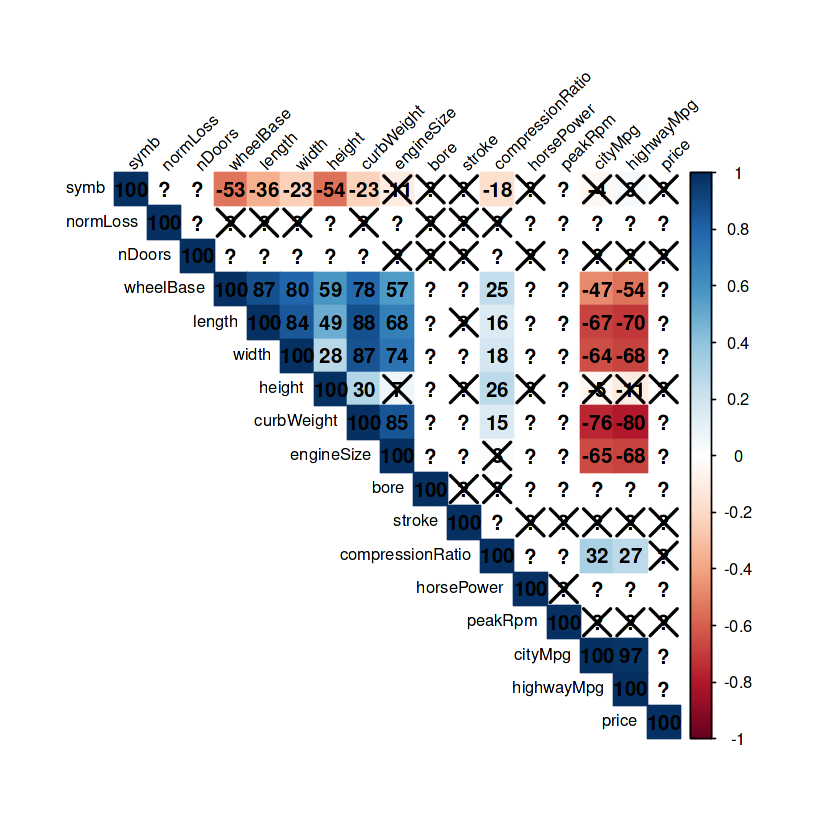

In [50]:
#Calcular la matriz de coorrelacion
corr_matrix <- cor(df_num, method = "pearson")

#Visualizar la matriz
corrplot(corr_matrix, method = "color", type = "upper", 
         tl.col = "black", tl.srt = 45, tl.cex = 0.8, 
         addCoef.col = "black", addCoefasPercent = TRUE,
         p.mat = corr_test$p, sig.level = 0.05)



## 5. Load the data set USJudgeRatings, from the datasets package, containing lawyers’ ratings of state judges in the US Superior Court regarding a set of attributes.

In [51]:
# Load the datasets package
library(datasets)

# Load the USJudgeRatings dataset
data(USJudgeRatings)

## (a) Apply the function prcomp() to obtain the principal components. Inspect how each variable is obtained by the linear combination of each component.

In [53]:
#Obtener los componentes principales
pca <- prcomp(USJudgeRatings)

#Revisar las variables de carga para cada componenete
var_loadings <- pca$rotation

print(var_loadings)

             PC1          PC2         PC3          PC4         PC5          PC6
CONT  0.00599117  0.933248839 -0.31985402  0.112932711  0.09462326 -0.002863094
INTG -0.23476045 -0.138724061 -0.36981582  0.252211159  0.04590748 -0.463156453
DMNR -0.34774394 -0.232070496 -0.66343490  0.034666432 -0.19413671  0.360824575
DILG -0.28678321  0.047953743  0.22433991  0.272806418 -0.37555702 -0.563858944
CFMG -0.27201855  0.163199298  0.18935451 -0.024818035 -0.47964024  0.169861226
DECI -0.25330240  0.117624159  0.24920335 -0.024620949 -0.42029465  0.368776968
PREP -0.30910791  0.047023458  0.21702209  0.191109898  0.14553660 -0.063861767
FAMI -0.30510111  0.014033493  0.26692334  0.168833090  0.47073965  0.107554568
ORAL -0.33195277  0.009669279  0.03718715  0.007519155  0.25286574  0.141530777
WRIT -0.31396635 -0.018092578  0.11487882  0.141585317  0.29475017  0.227041086
PHYS -0.27750639  0.096014861  0.03603598 -0.859239241  0.09522754 -0.241473592
RTEN -0.35932337 -0.033595756 -0.1956340

## (b) Load the package ggbiplot and plot the two first components with the function ggbiplot(). You can label each point with the lawyer’s name by setting the labels parameter.

In [56]:
# Load the ggplot2 package
library(ggplot2)


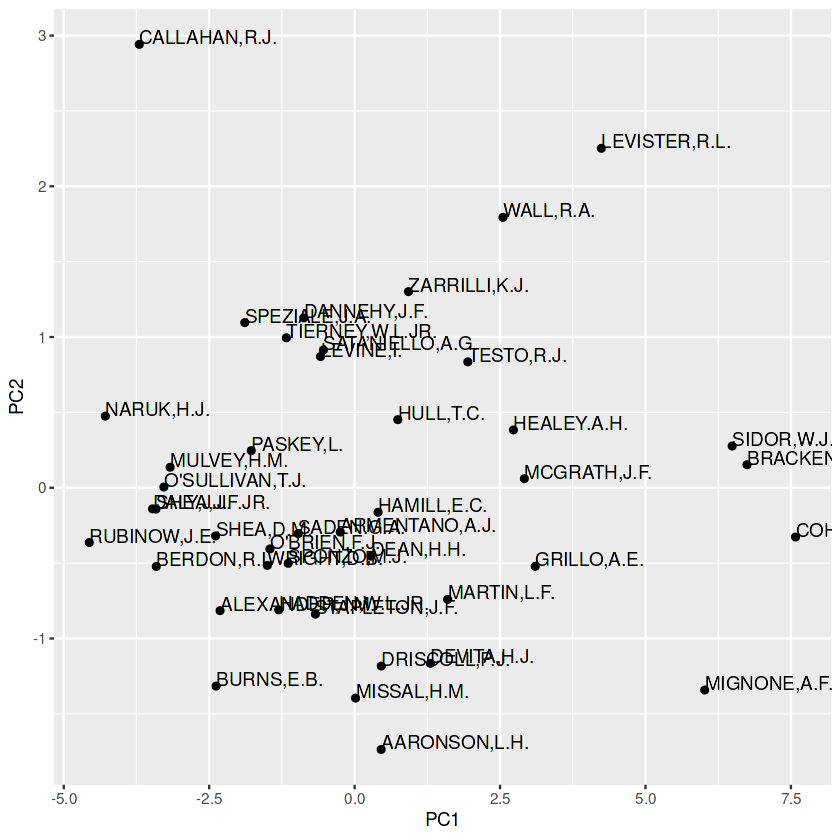

In [58]:
#Obtener los componentes principales
pca <- prcomp(USJudgeRatings)

#Extrarer los primeros 2 componenetes
PC1 <- pca$x[, 1]
PC2 <- pca$x[, 2]

#Graficar los primeros 2 componenetes
ggplot(data = USJudgeRatings, aes(x = PC1, y = PC2, label = row.names(USJudgeRatings))) +
  geom_point() +
  geom_text(hjust = 0, vjust = 0)